# Figure 2. High-resolution mapping of TDP-43 dependent alternative polyadenylation using 3’ end-seq

## Load libraries and functions

In [1]:
shhh <- suppressPackageStartupMessages
shhh(library(data.table))
shhh(library(stringr))
shhh(library(ggplot2))
shhh(library("GenomicRanges"))
library("viridis") 
library(patchwork)
library(ggrastr)
library(ggridges)
shhh(library(BSgenome.Hsapiens.UCSC.hg38))
Hs=BSgenome.Hsapiens.UCSC.hg38

Loading required package: viridisLite



In [2]:
library('Cairo')
CairoFonts(
regular="Sans:style=Light",
bold="Sans:style=Bold",
italic="Sans:style=Oblique",
bolditalic="Sans:style=BoldOblique"
)
options(repr.plot.width=12, repr.plot.height=8)

## Volcano plot for APA change

In [3]:
deduped_2.75_apa_paired = fread("Fig_2d_3end-seq_filtered-top2-paired-byFisherTest_for-plotting.csv")


In [4]:
apa_plot = ggplot(deduped_2.75_apa_paired, 
                  aes(delta_usage_plotting, 
                      NegLog10FisherPadj, 
                      color = fisher_APA_sig)) +
    geom_point(show.legend = F, size = 0.005) +
    geom_hline(yintercept = -log10(0.05), linewidth = 0.2, linetype = "dotted") +
    ggrepel::geom_text_repel(aes(label = ifelse(fisher_label == "yes", 
                                                 gene_name, 
                                                 "")), #, paste(SYMBOL, PAS_ID, sep = ":"), "")),
                             show.legend = F, 
                             box.padding = 0.1,
                             #label.padding = 0.1,
                             nudge_x = 0.05, 
                             nudge_y = 1,
                             size =1.5,
                             #label.size = 0,
                             max.overlaps = Inf) +  
    scale_color_manual(values = c("firebrick3", "gray50", "dodgerblue3")) +
    labs(x = "Delta dPUR",
         y = "-log10(p adj)") + 
    theme_classic(base_size = 6)

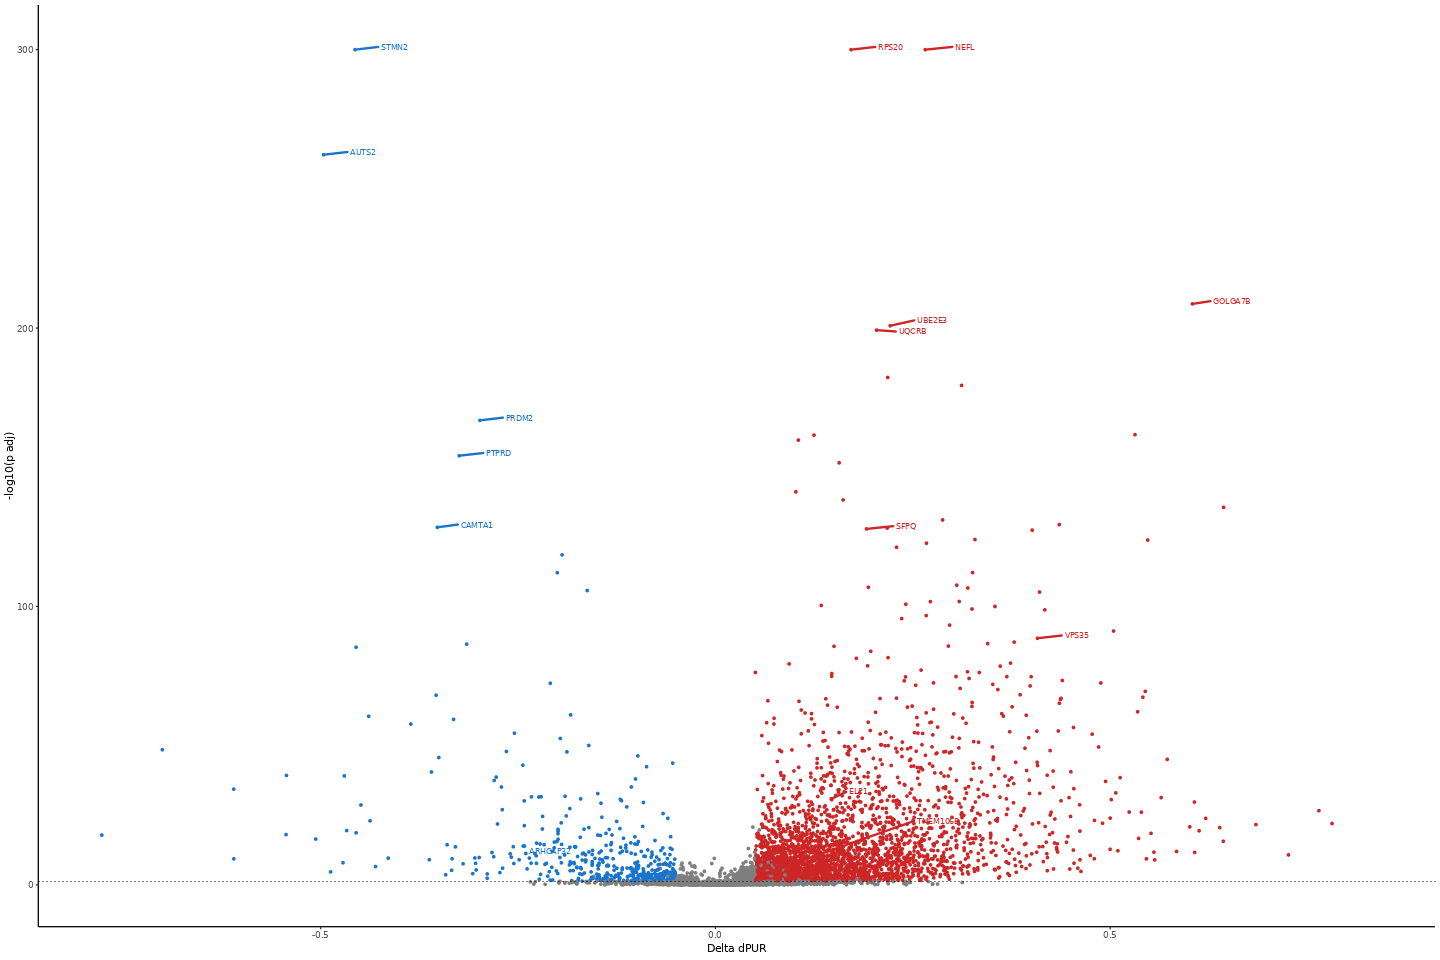

In [5]:
apa_plot

In [6]:
ggsave(apa_plot, file = "fig_2d.pdf", width = 2.25, height = 2.25, units = "in", dpi = 300)

## Fig. 2e, Overlap between APA and DEG

In [7]:
deg_apa = fread("Fig_2e_TDP43-7d-KD_APA-changes-overlap-w-DEG.csv")

In [8]:
unique(deg_apa$coordinated_change)

[1] "no"      "longer"  "shorter"

In [9]:
deg_apa$coordinated_change = factor(deg_apa$coordinated_change, levels = c("shorter","no", "longer"))

In [10]:
Fig_2e = ggplot(deg_apa, aes(APA_log2FC_plotting, deg_log2FC, color = coordinated_change)) + 
    geom_point(show.legend = F, size = 0.005) +
    scale_color_manual(values = c("dodgerblue3", "lightgray", "firebrick3")) +
    ggrepel::geom_text_repel(aes(label = ifelse(text_label == "yes" & coordinated_change == "longer", 
                                                 gene_name, 
                                                 "")), #, paste(SYMBOL, PAS_ID, sep = ":"), "")),
                             show.legend = F, 
                             box.padding = 0.2,
                             nudge_x = 0.05, 
                             #nudge_y = 2,
                             size = 1.5, 
                             max.overlaps = Inf) + 
    ggrepel::geom_text_repel(aes(label = ifelse(text_label == "yes" & coordinated_change == "shorter", 
                                                 gene_name, 
                                                 "")), #, paste(SYMBOL, PAS_ID, sep = ":"), "")),
                             show.legend = F, 
                             box.padding = 0.2,
                             nudge_x = -0.05, 
                             #nudge_y = 2,
                             size = 1.5, 
                             max.overlaps = Inf) +
    labs(x = "Log2(fold change, APA)",
         y = "log2(fold change, DEG)") +
    theme_classic(base_size = 6)

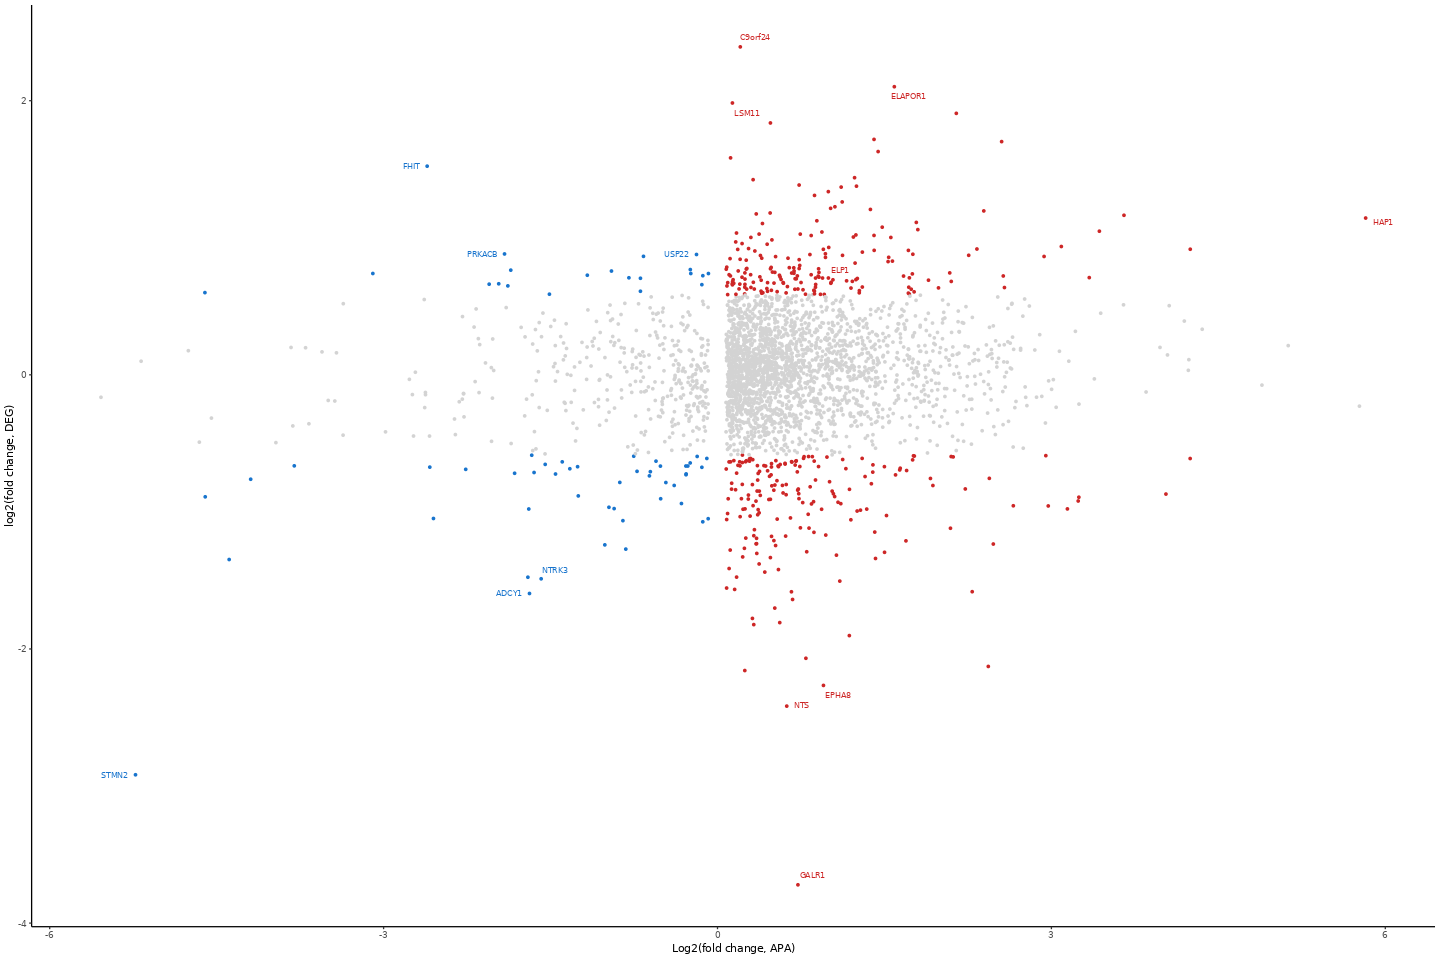

In [11]:
Fig_2e

In [12]:
ggsave(Fig_2e, file = "fig_2e.pdf", width = 2.25, height = 2.25, units = "in", dpi = 300)

In [13]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /share/software/user/open/openblas/0.3.10/lib/libopenblas_haswellp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] Cairo_1.6-2                       BSgenome.Hsapiens.UCSC.hg38_1.4.5
 [3] BSgenome_1.66.3                   rtracklayer_1.58.0               
 [5] Biostrings_2.66.0                 XVector_0.38.0                   
 [7] ggridges_0.5.6                    ggrastr_1.0.2     